# Practical work 2 : Fourier transform

This practial work is dedicated to the study of the discrete Fourier transform applied on the two following images:
![son.png](./img/son.png)
![sonrot.png](./img/sonrot.png)
and analyze the properties of their spectrum. To this end, we make use of the following functions provided by the module `numpy.fft`:

- `fft2()` to compute the Fourier transform on an image
- `fftshift()` to center the low frequencies
- `abs()` (from `numpy`) to compute the module of a complexe array

In most of cases, high frequencies have lower energy compare to low frequencies. We will use a logarithmic scale by applying $\log(1+abs(TF))$ to display the spectrum.

In [37]:
import numpy as np
from numpy.fft import fft2,fftshift
from PIL import Image

son = son = np.array(Image.open("img/son.png"))
print(son)
print(np.mean(son))
sonrot = np.array(Image.open('img/sonrot.png'))
print(np.mean(sonrot))
print(sonrot)
port = np.array(Image.open('img/port.jpg'))
print(port)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
231.4867401123047
187.4313201904297
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[105 105 106 ... 255 254 254]
 [105 105 107 ... 255 254 254]
 [105 106 107 ... 255 254 254]
 ...
 [255 255 255 ... 218 225 232]
 [255 255 255 ... 226 229 232]
 [255 255 255 ... 233 234 235]]


## Exercice: properties of Fourier transform applied on natural images
1. Write the following functions:
 - `computeFT(I)` returning the Fourier transform of image `I`,
 - `toVisualizeFT(If)` returning the centered module of a complex array `If` (the Fourier transform of an image),
 - `toVisualizeLogFT(If)` similar to the previous function but use a logarithmic scale.

In [38]:
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return np.abs(fftshift(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    return np.log(1+toVisualizeFT(If))



2. Write a series of instructions that
 - compute the Fourier transform of `son` and `sonrot`,
 - compute and display the module using a logarithmic scale,
 - threshold the module with a parameter of $1.10^5$ (use the function of TME1)
 - display the thresholded spectrum

In [39]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    J=np.copy(I)
    return np.where(J < s, 0, 255) 

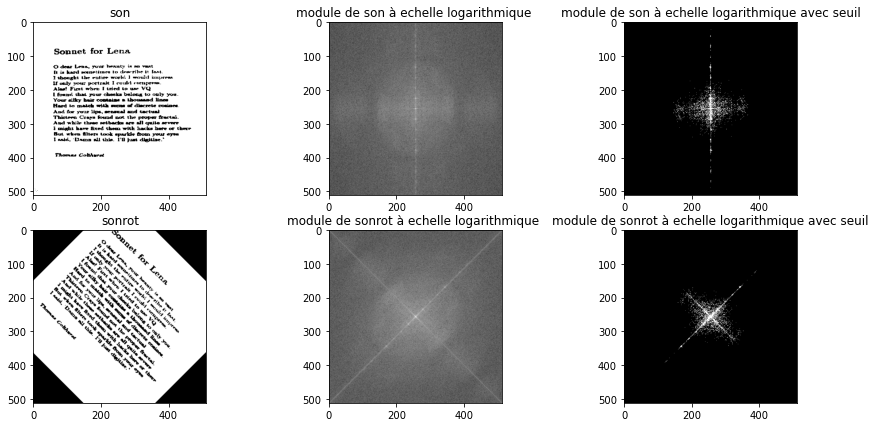

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[15,7]

# Récupérer les FT des images
son_fft=computeFT(son)
sonrot_fft=computeFT(sonrot)

# 
son_visu=toVisualizeLogFT(son_fft)
sonrot_visu=toVisualizeLogFT(sonrot_fft)

# Thresholder l'image avec un seuil de 10
son_thr = toVisualizeLogFT(thresholdImage(np.abs(son_fft),10**5))
sonrot_thr = toVisualizeLogFT(thresholdImage(np.abs(sonrot_fft),10**5))

# Afficher les plots obtenus
plt.gray()
plt.subplot(231)
plt.title('son')
plt.imshow(son)

plt.subplot(232)
plt.title('module de son à echelle logarithmique ')
plt.imshow(son_visu)

plt.subplot(233)
plt.title('module de son à echelle logarithmique avec seuil')
plt.imshow(son_thr)

plt.subplot(234)
plt.title('sonrot')
plt.imshow(sonrot)

plt.subplot(235)
plt.title('module de sonrot à echelle logarithmique ')
plt.imshow(sonrot_visu)

plt.subplot(236)
plt.title('module de sonrot à echelle logarithmique avec seuil')
plt.imshow(sonrot_thr)
plt.show()


3. Interpretation: discuss the results obtained on thresholded FT module. What property of the Fourier transform is shown ?

4. Write the function `blend()` getting two images, one float parameter $\alpha\in[0,1]$, calculating $\alpha I_1+(1-\alpha)I_2$ and returning the result. 

In [53]:
def blend(I1,I2,alpha):
    """ Array**2*float -> Array """
    return alpha*I1 + (1-alpha)*I2

5. Apply the previous function on images `son` and `sonrot` and $\alpha=\frac12$, compute the Fourier transform, threshold the module and visualize the result. 

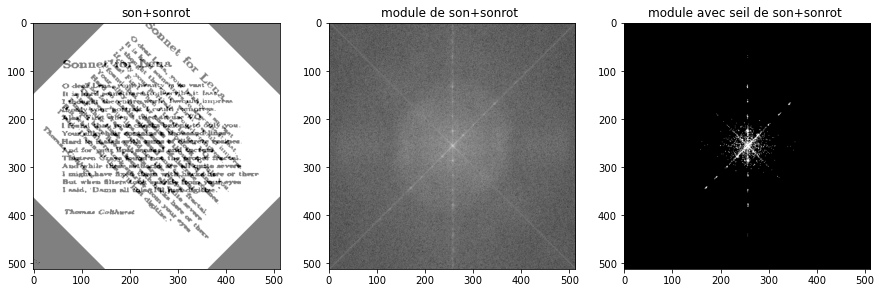

In [60]:
# Blender l'image
img_blended = blend(son, sonrot,0.5)

# Calculer la FT de l'image blender
blended_fft=computeFT(img_blended)
blended_visu=toVisualizeLogFT(blended_fft)
blended_visu_thresh=toVisualizeLogFT(thresholdImage(np.abs(blended_fft),10**5))

# Afficher le plot correspondant
plt.subplot(131)
plt.title('son+sonrot')
plt.imshow(img_blended)

plt.subplot(132)
plt.title('module de son+sonrot ')
plt.imshow(blended_visu)

plt.subplot(133)
plt.title('module avec seil de son+sonrot ')
plt.imshow(blended_visu_thresh)
plt.show()

6. Compare the latter result with those of question 2: what property of the Fourier transform is shown? What is the behaviour of $\alpha$ in the resulting spectrum?

La propriété de linéarité sur les transformés de Fourier est ici montrée. En effet, la DFT de la somme des images est égale à la somme des deux DFT. Alpha représente l'équilibre entre les deux images. Si elle tend vers 1, la première image a plus de poids. Et réciproquement, si alpha tend vers 0, l'image deux a plus de poids.

7. We want to determine the text orientation in image `sonrot` and produce a new image with horizontal text. Write the function `rectifyOrientation()` that:

 + computes the FT module of image given in parameter and threshold it at $3\times 10^{5}$,
 + from thresholded module determines the main orientation using the function `mainOrientation()` 
 + produces the rectified image applying a rotation with a suitable angle using `rotateImage()`

In [98]:
def mainOrientation(I):
    """ Array -> tuple[Iori,float]
        return image of orientation (32 bins) and the main orientation (degree) from a Fourier transform module
    """
    n, m = I.shape

    size = 32
    x = np.array(range(size))
    ori = np.vstack((np.cos(np.pi*x/size), np.sin(np.pi*x/size))).T

    Iori = np.zeros((n, m))
    orients = np.zeros((size))

    for i in range(1,n+1):
        for j in range(1,m+1):
            if I[i-1, j-1] > 0:
                v = np.array([j-m/2, -i + n/2])
                if i > n/2:
                    v = -v
                    prod = np.matmul(ori, v)
                    maxi = prod.max()
                    if maxi > 0:
                        imax = np.nonzero(prod == maxi)
                        Iori[i-1, j-1] = imax[0]
                        orients[imax] += 1

    maxori = np.nonzero(orients == orients.max())[0][0]
    return (Iori, 180*maxori/size - 90)

def rotateImage(I,a):
    """ Array*float -> Array 
        return a rotation of angle a (degree) of image I
    """
    return np.array(Image.fromarray(I).rotate(a, expand=True, fillcolor=127))

####### your code below

def rectifyOrientation(I):
    i_fft = computeFT(I)
    i_visu = toVisualizeFT(i_fft)
    i_thr = thresholdImage(i_visu, 3*(10**5))
    II, rot = mainOrientation(i_thr)
    rotatedI = rotateImage(I, -rot)
    return rotatedI

8. Experiment `rectifyOrientation()` on `sinrot`, and on a rotation of `img/port.jpg` (using `rotateImage()`) with various rotation angles.  

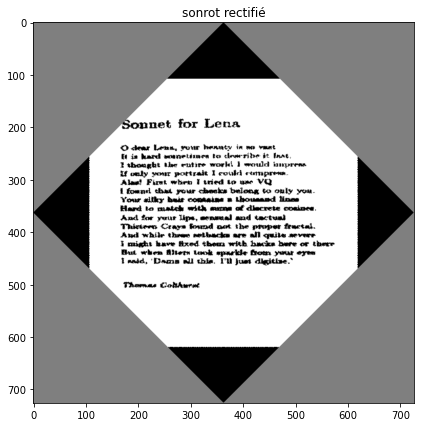

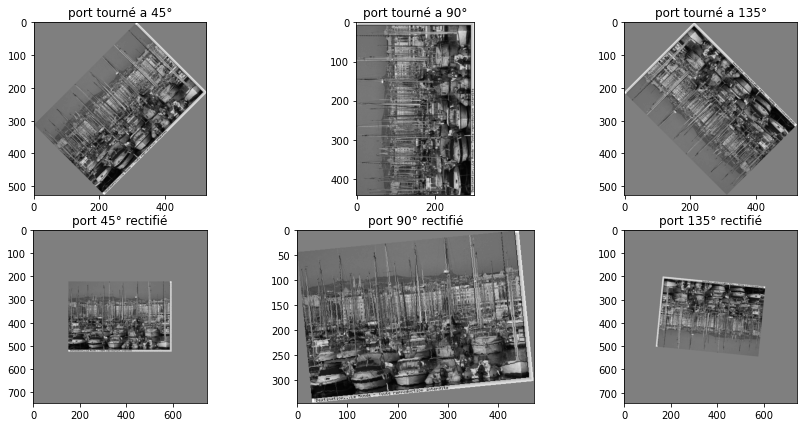

In [99]:
sonrot_corrected = rectifyOrientation(sonrot)
plt.title("sonrot rectifié")
plt.imshow(sonrot_corrected)
plt.show()

port_rotated_45 = rotateImage(port,45)
port_rotated_90 = rotateImage(port,90)
port_rotated_135 = rotateImage(port,135)

plt.subplot(231)
plt.title("port tourné a 45°")
plt.imshow(port_rotated_45)
plt.subplot(232)
plt.title("port tourné a 90°")
plt.imshow(port_rotated_90)
plt.subplot(233)
plt.title("port tourné a 135°")
plt.imshow(port_rotated_135)

plt.subplot(234)
plt.title("port 45° rectifié")
plt.imshow(rectifyOrientation(port_rotated_45))
plt.subplot(235)
plt.title("port 90° rectifié")
plt.imshow(rectifyOrientation(port_rotated_90))
plt.subplot(236)
plt.title("port 135° rectifié")
plt.imshow(rectifyOrientation(port_rotated_135))

plt.show()